Logistic Regression
=========================

## Classifying data with a non-linear decision boundary

*This example uses Logistic Regression to classify data points in a training set using a non-linear decision boundary.*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots Scipy is also used for optimisation during training.

In [156]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Load Data

In [157]:
data = np.loadtxt("../data/ex2data2.txt",delimiter=',')
x_data = data[:,[0,1]]
y_data = data[:,2]

### Plot training data with labels

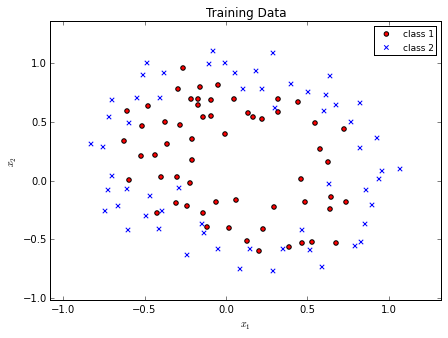

In [158]:
# Plot data points with labels
pos,neg = np.where(y_data==1),np.where(y_data==0)
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')

plt.xlim([min(x_data[:,0]-0.25),max(x_data[:,0])+0.25])
plt.ylim([min(x_data[:,1]-0.25),max(x_data[:,1])+0.25])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Training Data")
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Feature Mapping

In [159]:
def featuremapping(X1,X2,degree=6):
    #   Feature mapping function to polynomial features
    try:
        out = np.ones(( X1.shape[0], sum(range(degree + 2)) )) 
    except:
        out = np.ones(( 1, sum(range(degree + 2)) )) 

    idx = 1
    for i in xrange(1, degree + 1):
        for j in xrange(i+1):
            out[:,idx] = np.power(X1,i-j) * np.power(X2,j)
            idx += 1

    return out

In [160]:
degree = 6
X = featuremapping(x_data[:,0],x_data[:,1],degree=degree)

### Define parameters

In [161]:
# -- Training set and Feature set size-- #
m = float(np.shape(X)[0])	# m training samples
n = np.shape(X)[1] -1		# n features
print "samples:  ", m
print "features: ", n

samples:   118.0
features:  27


### Sigmoid Activation Function

$g(z) = \frac{1}{1+e^{-z}}$

In [162]:
def sigmoid(z):

    return np.divide(1.0, (np.add(1.0,np.exp(-z)) ) )

### Cost Function and Gradient with Regularisation

$h_{\theta}(x) = g(\theta^T x)$

$J(\theta) = \frac{1}{m} \sum^m_{i=1} [-y^{(i)} log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum^n_{j=1} \theta_j^2$

$\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} \hspace{3.8cm}$ for $j=0$

$\frac{\delta J(\theta)}{\delta \theta_j} = (\frac{1}{m} \sum^m_{i=1} (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{2m} \theta_j^2 \hspace{2cm}$ for $j\geq 1$

In [163]:
def cost_reg(theta,X,y,Lambda):

    m = float(len(y))
    H = sigmoid(np.dot(X,theta))

    T = np.multiply(y,np.log(H)) + np.multiply(np.subtract(1,y),(np.log(1-H)))
    J = -np.dot((1.0/m), np.sum(T)) + np.dot(Lambda/(2*m), np.sum(np.square(theta[1:len(theta)])))
    return J

In [164]:
def grad_reg(theta,X,y,Lambda):

    m = float(len(y))
    H = sigmoid(np.dot(X,theta))

    ta = np.transpose(np.array([np.insert(theta[1:len(theta)],0,0)]))
    grad = np.add(np.dot(np.transpose(X),(H - y))/m, np.multiply((Lambda/m),ta)) 

    return grad

In [165]:
# Initial theta
theta = np.zeros(n+1)

# Set regularization parameter lambda to 1
Lambda = 1

cost = cost_reg(theta,X,y_data,Lambda)

print 'Cost at initial theta (zeros): \n', cost

Cost at initial theta (zeros): 
0.69314718056


### Train

In [166]:
theta_opt = opt.fmin_bfgs(cost_reg, theta, args=(X, y_data,Lambda))
cost = cost_reg(theta_opt,X,y_data,Lambda) 

print '\nCost at theta at optimum: ', cost

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48

Cost at theta at optimum:  0.529002742289


### Decision Boundary

In [167]:
def nonlin_decision_boundary(theta,grid,degree):

    z = np.zeros(( len(grid[0]), len(grid[1]) ))
    # Evaluate z = theta*x over the grid
    for i in xrange(len(grid[0])):
        for j in xrange(len(grid[1])):
            z[i,j] = np.dot(featuremapping(np.array([grid[0][i]]), np.array([grid[1][j]]),degree=degree),theta)
    z = np.transpose(z) 

    return z

In [168]:
# Calculate the desicision boundary
grid = [np.linspace(-1, 1.5, 50),np.linspace(-1, 1.5, 50)]
z = nonlin_decision_boundary(theta_opt,grid,degree)

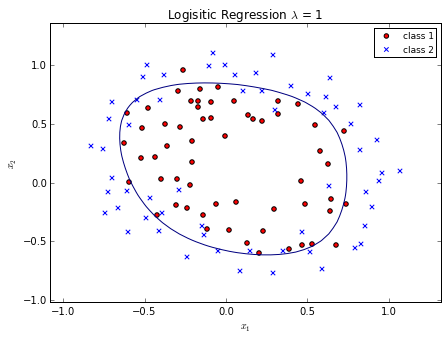

In [169]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.contour(grid[0], grid[1], z, levels=[0], linewidth=2,label="Decision Boundary").collections[0]
plt.xlim([min(x_data[:,0]-0.25),max(x_data[:,0])+0.25])
plt.ylim([min(x_data[:,1]-0.25),max(x_data[:,1])+0.25])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression $\lambda$ = " + str(Lambda))
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Predict class of new data point

In [170]:
# Point for classification
point = [0,0.25]
# Probability of point being part of class 1
prob = sigmoid(np.dot(featuremapping(point[0], point[1],degree=degree)[0], theta_opt))
print "Probability of new data point being part of class 1: ", prob

Probability of new data point being part of class 1:  0.813113597354


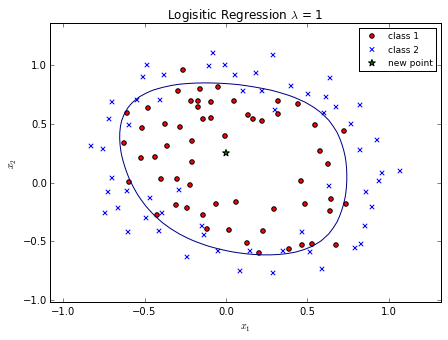

In [171]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.contour(grid[0], grid[1], z, levels=[0], linewidth=2,label="Decision Boundary").collections[0]
plt.xlim([min(x_data[:,0]-0.25),max(x_data[:,0])+0.25])
plt.ylim([min(x_data[:,1]-0.25),max(x_data[:,1])+0.25])
plt.scatter(point[0],point[1],marker='*',c='green',s=50,label='new point')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression $\lambda$ = " + str(Lambda))
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Accuracy on training set

In [172]:
def accuracy(theta,X,labels):
    p = sigmoid(np.dot(X, theta))>=0.5 
    return np.mean(p == labels) * 100.0

In [173]:
# Predict Accuracy on Training Set
print "Accuracy on Training Set: ", accuracy(theta_opt,X,y_data), "%"

Accuracy on Training Set:  83.0508474576 %


### Regularisation Parameter

$\lambda = 0.005$

Optimization terminated successfully.
         Current function value: 0.322732
         Iterations: 159
         Function evaluations: 4800
         Gradient evaluations: 160


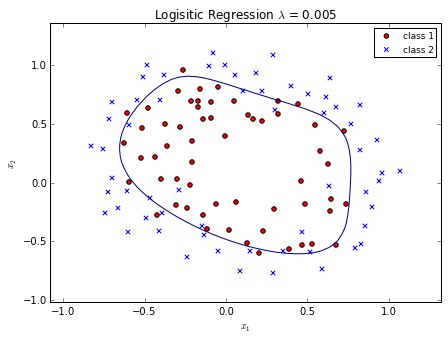

In [174]:
Lambda = 0.005
theta_opt = opt.fmin_bfgs(cost_reg, theta, args=(X, y_data,Lambda))
grid = [np.linspace(-1, 1.5, 50),np.linspace(-1, 1.5, 50)]
z = nonlin_decision_boundary(theta_opt,grid,degree)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.contour(grid[0], grid[1], z, levels=[0], linewidth=2,label="Decision Boundary").collections[0]
plt.xlim([min(x_data[:,0]-0.25),max(x_data[:,0])+0.25])
plt.ylim([min(x_data[:,1]-0.25),max(x_data[:,1])+0.25])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression $\lambda$ = " + str(Lambda))
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

In [175]:
print "Accuracy on Training Set: ", accuracy(theta_opt,X,y_data), "%"

Accuracy on Training Set:  83.8983050847 %


$\lambda = 100$

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 240
         Gradient evaluations: 8


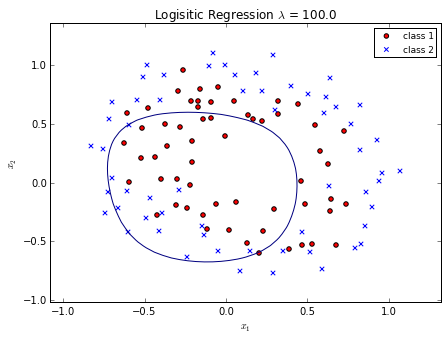

In [176]:
Lambda = 100.0
theta_opt = opt.fmin_bfgs(cost_reg, theta, args=(X, y_data,Lambda))
grid = [np.linspace(-1, 1.5, 50),np.linspace(-1, 1.5, 50)]
z = nonlin_decision_boundary(theta_opt,grid,degree)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.contour(grid[0], grid[1], z, levels=[0], linewidth=2,label="Decision Boundary").collections[0]
plt.xlim([min(x_data[:,0]-0.25),max(x_data[:,0])+0.25])
plt.ylim([min(x_data[:,1]-0.25),max(x_data[:,1])+0.25])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression $\lambda$ = " + str(Lambda))
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

In [177]:
print "Accuracy on Training Set: ", accuracy(theta_opt,X,y_data), "%"

Accuracy on Training Set:  61.0169491525 %
